In [1]:
import pandas as pd
import networkx as nx
import json
import requests
import matplotlib as plt
import cfbd

In [2]:
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'YJ5gLZjtsR9KtIihcsBr50B+fdpMMkb2vPwmN+NSP1H8Iyf1a4x8d+LdBPe3CAHl'
configuration.api_key_prefix['Authorization'] = 'Bearer'

In [24]:
api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))
games = api_instance.get_games(year=2022, conference='SEC')
games_df = pd.DataFrame(games)
games_df

,0
0,"{'attendance': None,\n 'away_conference': 'SEC..."
1,"{'attendance': None,\n 'away_conference': 'Mid..."
2,"{'attendance': None,\n 'away_conference': 'Con..."
3,"{'attendance': None,\n 'away_conference': 'Wes..."
4,"{'attendance': None,\n 'away_conference': 'Ame..."
...,...
108,"{'attendance': None,\n 'away_conference': 'ACC..."
109,"{'attendance': None,\n 'away_conference': 'SEC..."
110,"{'attendance': None,\n 'away_conference': 'SEC..."
111,"{'attendance': None,\n 'away_conference': 'SEC..."


In [10]:
graph = nx.Graph()

In [22]:
teams = []
for k in games:
    home_team = k.home_team
    away_team = k.away_team
    if home_team not in teams:
        teams.append(home_team)
    if away_team not in teams:
        teams.append(away_team)
print(teams)

["Hawai'i", 'Vanderbilt', 'Tennessee', 'Ball State', 'Missouri', 'Louisiana Tech', 'Texas A&M', 'Sam Houston State', 'Georgia', 'Oregon', 'Arkansas', 'Cincinnati', 'Ole Miss', 'Troy', 'Elon', 'Florida', 'Utah', 'Auburn', 'Mercer', 'Kentucky', 'Miami (OH)', 'Mississippi State', 'Memphis', 'Alabama', 'Utah State', 'South Carolina', 'Georgia State', 'Florida State', 'LSU', 'Kansas State', 'Texas', 'Wake Forest', 'Appalachian State', 'Pittsburgh', 'Samford', 'Central Arkansas', 'San José State', 'Southern', 'Arizona', 'Abilene Christian', 'Youngstown State', 'Northern Illinois', 'Penn State', 'Georgia Tech', 'Louisiana Monroe', 'Akron', 'Missouri State', 'South Florida', 'Miami', 'Bowling Green', 'Kent State', 'Tulsa', 'Charlotte', 'New Mexico', 'South Carolina State', 'Eastern Washington', 'BYU', 'UT Martin', 'Liberty', 'Austin Peay', 'East Tennessee State', 'UMass', 'Western Kentucky', 'New Mexico State', 'UAB', 'Clemson', 'Louisville']


In [23]:
for team in teams:
    graph.add_node(team)

In [25]:
for k in games:
    if  k.home_points > k.away_points:
        winner = k.home_points
        loser = k.away_points
    else:
        winner = k.away_points
        loser = k.home_points
    graph.add_edge(winner, loser)

AttributeError: module 'matplotlib' has no attribute 'show'

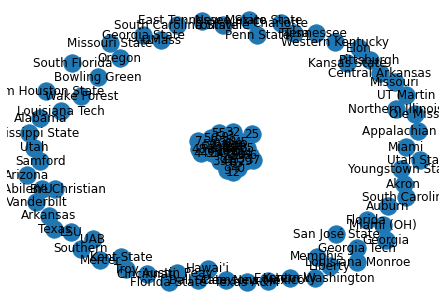

In [26]:
nx.draw(graph, with_labels=True)
plt.show()